In [94]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from tqdm import tqdm

In [111]:
dims = [f'dim{k}' for k in range(1,33)]
#emb_dir = '/neurospin/dico/jlaval/Output/test_augmented_embeddings/09-33-31_0/troiani_augmented_embeddings'
emb_dir = '/neurospin/dico/jlaval/Output/test_augmented_embeddings_cing/11-22-27_0/ukb_augmented_embeddings'
embs_dir = os.listdir(emb_dir)
embs_dir = [direc for direc in embs_dir if 'embeddings' in direc]

In [112]:
embs_list = []
for file in embs_dir:
    embs = pd.read_csv(os.path.join(emb_dir, file))
    embs_list.append(embs)
full_embs = pd.concat(embs_list)

In [113]:
subjects = embs['ID'].tolist()

In [114]:
means, medians, stds, maxs, quants = [], [], [], [], []
for subject in tqdm(subjects):
    sub_embs = full_embs.loc[full_embs['ID']==subject][dims]
    dists = pairwise_distances(sub_embs, metric='cosine')
    dists = dists[~np.eye(dists.shape[0], dtype=bool)]
    means.append(np.mean(dists))
    medians.append(np.median(dists))
    quants.append(np.quantile(dists, 0.95))
    maxs.append(np.max(dists))
    stds.append(np.std(dists))

In [115]:
df_augmentation_stats = pd.DataFrame(data = np.array([means, medians, quants, maxs, stds]).T, columns=['Mean', 'Median', 'Q95', 'Max', 'Std'], index=subjects)

(array([3.3666e+04, 7.1460e+03, 1.0390e+03, 3.1000e+02, 1.3800e+02,
        8.4000e+01, 2.8000e+01, 1.6000e+01, 4.0000e+00, 2.0000e+00]),
 array([0.00096573, 0.02930545, 0.05764517, 0.0859849 , 0.11432462,
        0.14266434, 0.17100406, 0.19934378, 0.2276835 , 0.25602323,
        0.28436295]),
 <BarContainer object of 10 artists>)

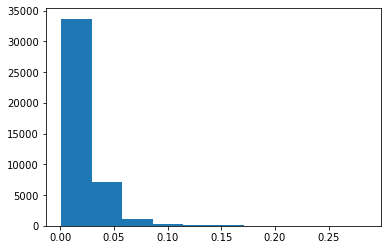

In [116]:
plt.hist(df_augmentation_stats['Mean'])

(array([3.7537e+04, 4.5650e+03, 2.7200e+02, 3.5000e+01, 1.4000e+01,
        5.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.00082915, 0.03200272, 0.06317628, 0.09434985, 0.12552342,
        0.15669698, 0.18787055, 0.21904411, 0.25021768, 0.28139124,
        0.31256481]),
 <BarContainer object of 10 artists>)

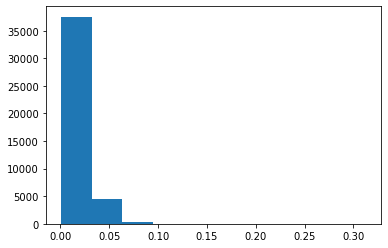

In [117]:
plt.hist(df_augmentation_stats['Median'])

(array([3.8737e+04, 2.6310e+03, 5.8100e+02, 2.3100e+02, 1.2600e+02,
        7.1000e+01, 3.1000e+01, 1.2000e+01, 9.0000e+00, 4.0000e+00]),
 array([3.25309758e-04, 3.39564611e-02, 6.75876125e-02, 1.01218764e-01,
        1.34849915e-01, 1.68481067e-01, 2.02112218e-01, 2.35743369e-01,
        2.69374521e-01, 3.03005672e-01, 3.36636824e-01]),
 <BarContainer object of 10 artists>)

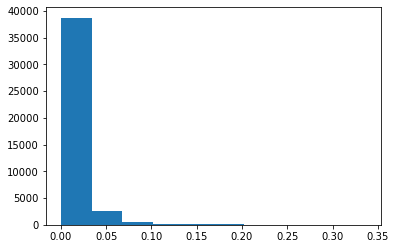

In [118]:
plt.hist(df_augmentation_stats['Std'])

In [120]:
## analyse subs
df_augmentation_stats.sort_values(by='Mean').index.tolist()[-20:]

['sub-5777016',
 'sub-5258060',
 'sub-5989005',
 'sub-1793689',
 'sub-4239849',
 'sub-1575678',
 'sub-2901014',
 'sub-3419526',
 'sub-3792987',
 'sub-5750564']